In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [21]:
lo = LeaveOneOut()

In [12]:
data = pd.read_csv('data_tc_pred.csv')

In [13]:
columns = ['VF FCC_A1#2', 'ND FCC_A1#2',
       'MR FCC_A1#2', 'VF HCP_A3#2', 'ND HCP_A3#2', 'MR HCP_A3#2',
       'VF M7C3_D101', 'ND M7C3_D101', 'MR M7C3_D101']
y = data['yeld strength']

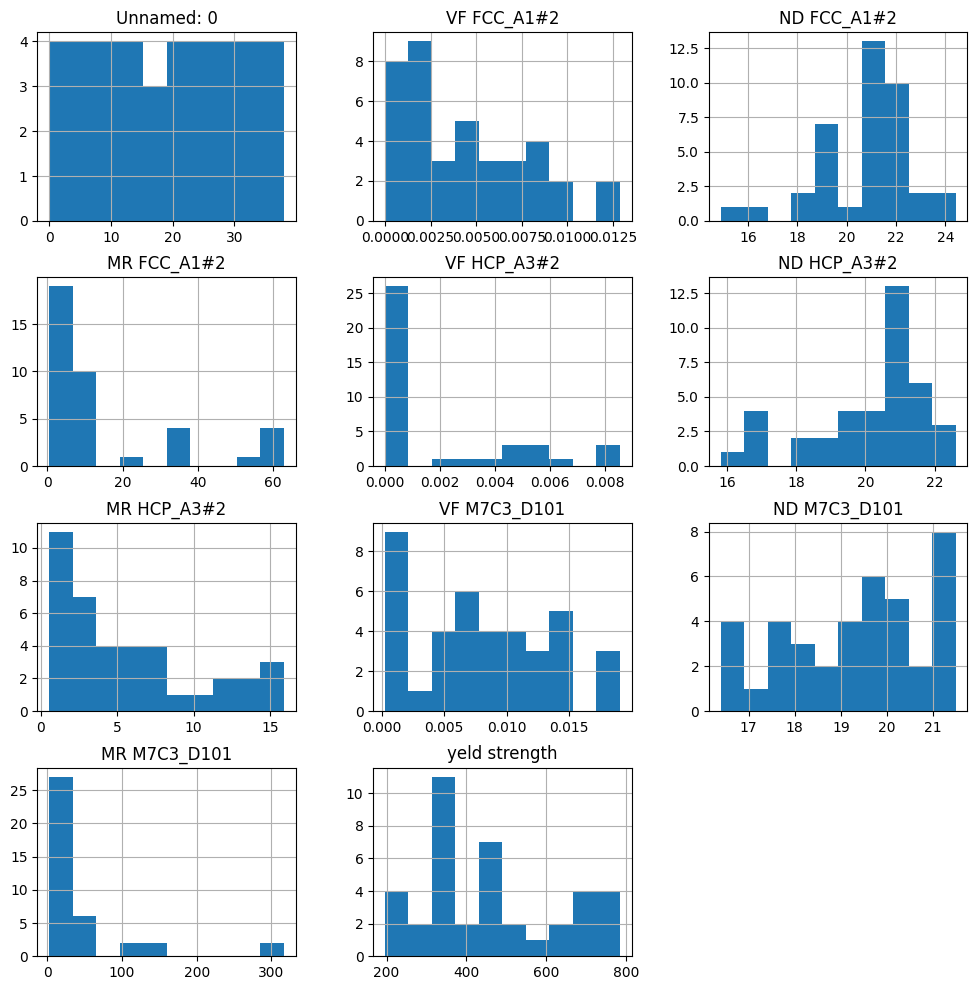

In [18]:
plt.rcParams['figure.figsize'] = 12, 12
data.hist();
plt.rcParams['figure.figsize'] = 6, 4

In [15]:
X = np.array(data[columns])
y = np.array(y)

# RF

In [16]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

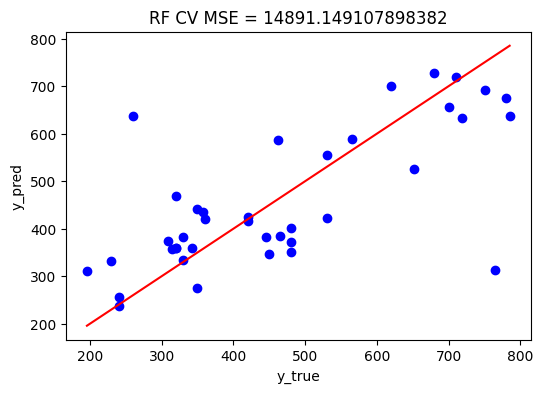

In [22]:
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

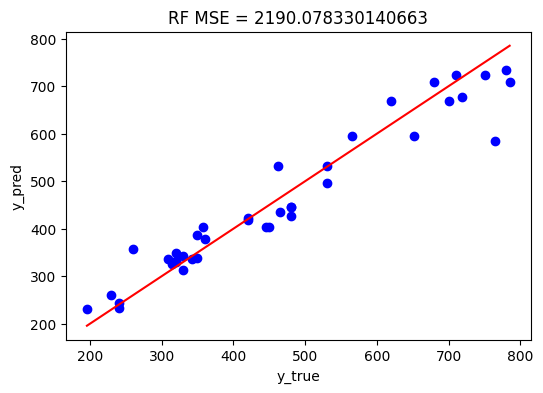

In [19]:
plot_result(rf, X, y, metric=mse, title='RF')